# PRCP-1000-PortugeseBank

## Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the bank marketing team to know
which customer will buy the product.

Task3:-Suggestions to the Bank market team to make customers buy the product.
ort warnings


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/bank-additional-full.csv", sep=';')

In [3]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The dataset contains 41,188 customer records with 21 variables. Each row represents a client who was contacted during a marketing campaign. The dataset includes demographic details, previous campaign information, and economic indicators

The target variable y indicates whether the customer subscribed to a term deposit. Since this is a binary outcome (yes/no), the problem is a binary classification task

The dataset consists of both numerical and categorical features, which will require appropriate preprocessing before model training


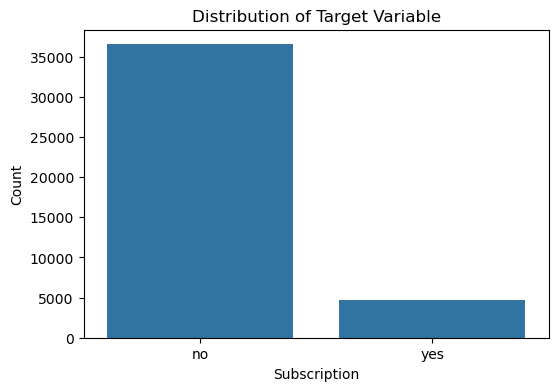

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['y'])
plt.title("Distribution of Target Variable")
plt.xlabel("Subscription")
plt.ylabel("Count")
plt.show()

In [8]:
df['y'].value_counts(normalize=True) * 100

y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64

The target variable is highly imbalanced. A large majority of customers did not subscribe to the term deposit, while only a small percentage responded positively. This imbalance is important because it can influence model performance and evaluation metrics. Accuracy alone may not be sufficient, and metrics such as precision and recall will be more meaningful during model evaluation.


In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
df[['age', 'campaign', 'pdays', 'previous']].describe()

,age,campaign,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963
std,10.42125,2.770014,186.910907,0.494901
min,17.00000,1.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000


### Numerical Feature Overview

The numerical variables provide useful insights into customer behavior and campaign patterns. The average customer age is around 40 years, with ages ranging from 17 to 98 years.

The campaign variable, which represents the number of contacts made during the current campaign, ranges from 1 to 56. While most customers were contacted only a few times, a small number were contacted many times, indicating potential repeated follow-ups.

The pdays variable has a maximum value of 999. According to the dataset description, this value represents customers who were not contacted in previous campaigns. Since a large portion of the dataset contains this value, it suggests that most customers were being contacted for the first time.

The previous variable shows that most customers had no prior contacts before the current campaign.


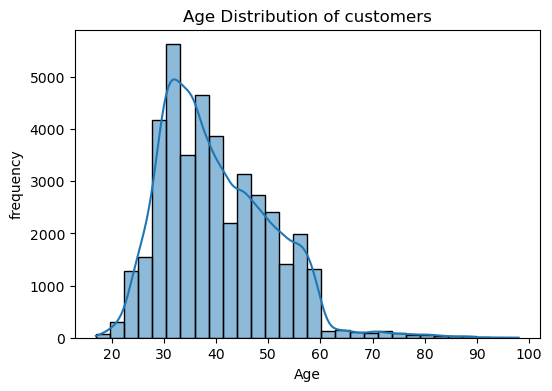

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'],bins=30,kde=True)
plt.title('Age Distribution of customers')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

### Age Distribution

The age distribution appears to be slightly right-skewed, with most customers falling between 30 and 50 years of age. The highest concentration is around the early 30s. There are relatively fewer very young and very old customers in the dataset.

This suggests that the campaign primarily targeted middle-aged individuals, which may influence overall subscription behavior.

In [12]:
df['age_group'] = pd.cut(df['age'], bins=[17,25,35,45,55,65,100])
age_subscription = pd.crosstab(df['age_group'], df['y'], normalize='index') * 100
age_subscription

y,no,yes
age_group,,
"(17, 25]",79.108970,20.891030
"(25, 35]",88.280461,11.719539
"(35, 45]",91.490190,8.509810
"(45, 55]",91.308037,8.691963
"(55, 65]",84.778940,15.221060
"(65, 100]",53.150242,46.849758


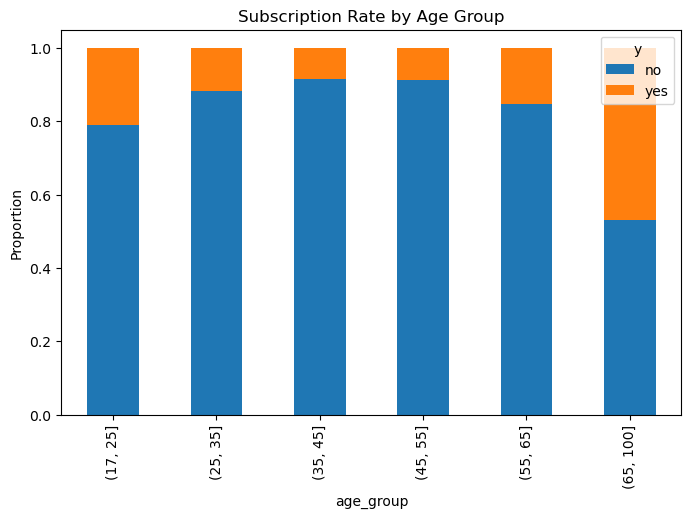

In [13]:
df['age_group'] = pd.cut(df['age'], bins=[17,25,35,45,55,65,100])
age_subscription = pd.crosstab(df['age_group'], df['y'], normalize='index') * 100
age_subscription

age_subscription = pd.crosstab(df['age_group'], df['y'], normalize='index')
age_subscription.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Subscription Rate by Age Group")
plt.ylabel("Proportion")
plt.show()

In [14]:
campaign_analysis = pd.crosstab(df['campaign'], df['y'], normalize='index') * 100
campaign_analysis.head(10)

y,no,yes
campaign,,
1,86.962929,13.037071
2,88.543046,11.456954
3,89.252949,10.747051
4,90.607318,9.392682
5,92.495310,7.504690
6,92.339122,7.660878
7,93.958665,6.041335
8,95.750000,4.250000
9,93.992933,6.007067


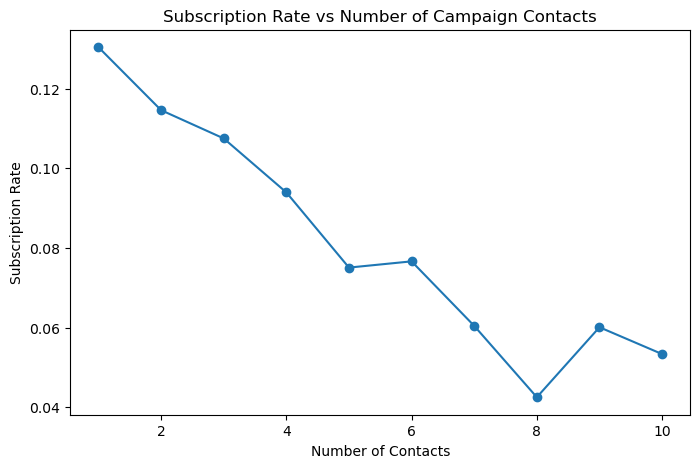

In [15]:
campaign_analysis = pd.crosstab(df['campaign'], df['y'], normalize='index')
campaign_analysis['yes'].head(10).plot(kind='line', marker='o', figsize=(8,5))
plt.title("Subscription Rate vs Number of Campaign Contacts")
plt.ylabel("Subscription Rate")
plt.xlabel("Number of Contacts")
plt.show()

### Campaign Contacts vs Subscription

The subscription rate decreases as the number of campaign contacts increases. Customers contacted only once show the highest conversion rate, while repeated contacts result in lower subscription percentages.

This suggests diminishing returns from repeated follow-ups. Excessive calls may not improve conversion and could potentially reduce campaign efficiency. Optimizing the number of contacts per customer could help reduce unnecessary marketing effort.

In [16]:
poutcome_analysis = pd.crosstab(df['poutcome'], df['y'], normalize='index') * 100
poutcome_analysis

y,no,yes
poutcome,,
failure,85.771402,14.228598
nonexistent,91.167787,8.832213
success,34.887109,65.112891


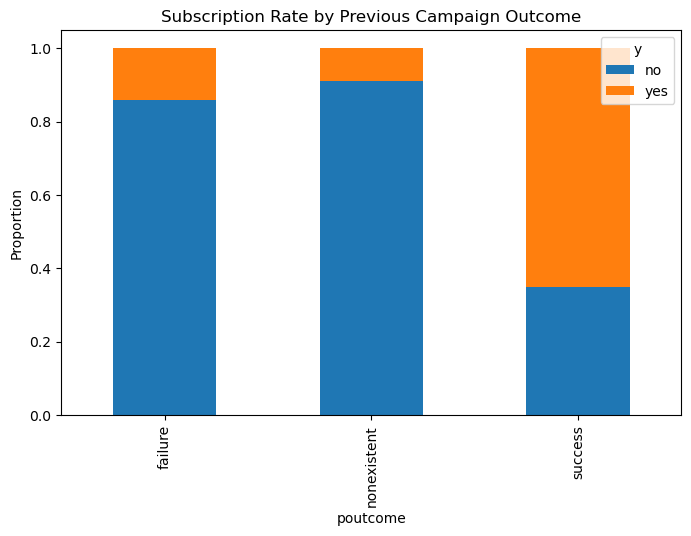

In [17]:
poutcome_analysis = pd.crosstab(df['poutcome'], df['y'], normalize='index')
poutcome_analysis.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Subscription Rate by Previous Campaign Outcome")
plt.ylabel("Proportion")
plt.show()

### Previous Campaign Outcome vs Subscription

Customers who previously had a successful outcome show a significantly higher subscription rate in the current campaign. Over 65% of these customers subscribed again, compared to much lower rates among customers with previous failures or no prior campaign contact.

This indicates that prior positive engagement is a strong predictor of future subscription behavior. Retargeting customers with past success could significantly improve campaign performance.


In [18]:
contact_analysis = pd.crosstab(df['contact'], df['y'], normalize='index')
contact_analysis

y,no,yes
contact,,
cellular,0.852624,0.147376
telephone,0.947687,0.052313


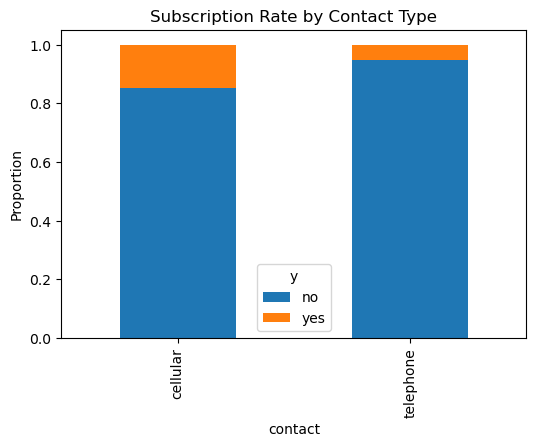

In [19]:
contact_analysis.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title("Subscription Rate by Contact Type")
plt.ylabel("Proportion")
plt.show()

### Contact Method vs Subscription

Customers contacted through cellular show a significantly higher subscription rate compared to those contacted via telephone. This suggests that mobile communication may be more effective for marketing outreach and should be prioritized in future campaigns.

In [20]:
month_analysis = pd.crosstab(df['month'], df['y'], normalize='index')
month_analysis

y,no,yes
month,,
apr,0.795213,0.204787
aug,0.893979,0.106021
dec,0.510989,0.489011
jul,0.909534,0.090466
jun,0.894885,0.105115
mar,0.494505,0.505495
may,0.935653,0.064347
nov,0.898561,0.101439
oct,0.561281,0.438719


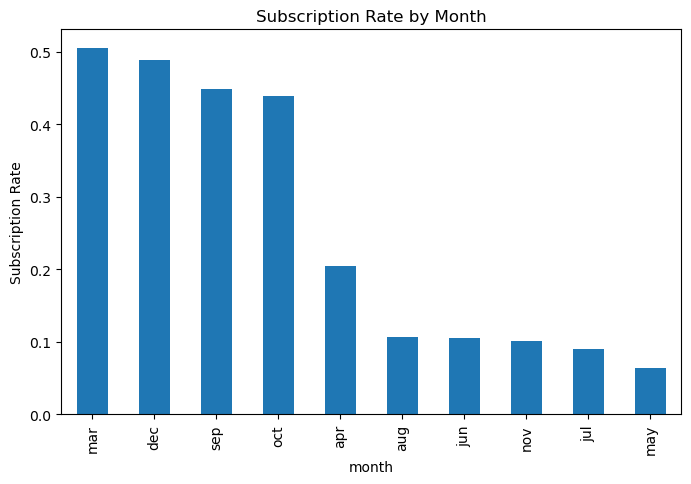

In [21]:
month_analysis['yes'].sort_values(ascending=False).plot(kind='bar', figsize=(8,5))
plt.title("Subscription Rate by Month")
plt.ylabel("Subscription Rate")
plt.show()

In [22]:
df['month'].value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

### Subscription Rate by Month

Subscription rates vary across different months. Certain months show significantly higher conversion rates compared to others. However, it is important to consider campaign volume in each month, as some months with high conversion rates may have fewer total contacts.

Seasonal trends may influence customer behavior, and campaign timing could play an important role in improving effectiveness


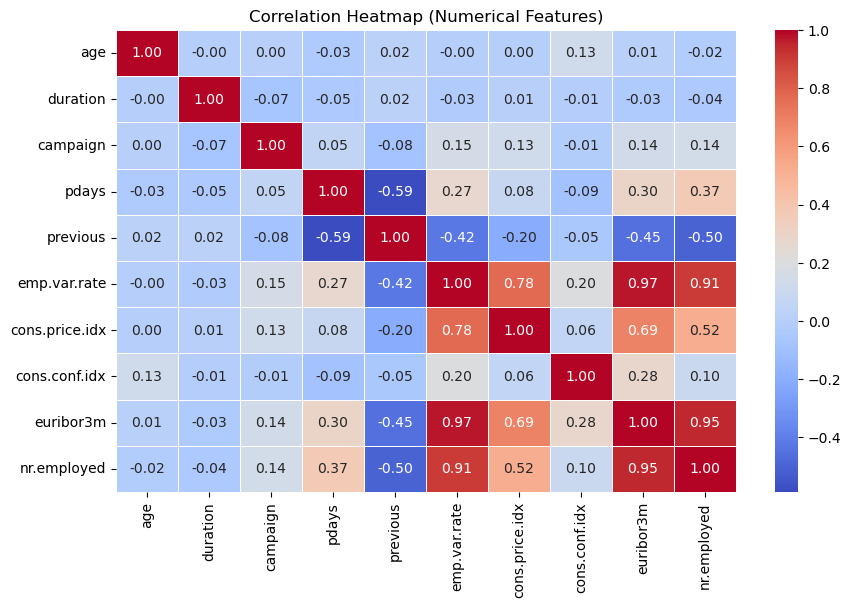

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

### Correlation Analysis

The correlation heatmap shows that certain economic indicators, such as euribor3m, employment variation rate, and number of employees, are strongly correlated with each other. This suggests potential multicollinearity among macroeconomic variables.


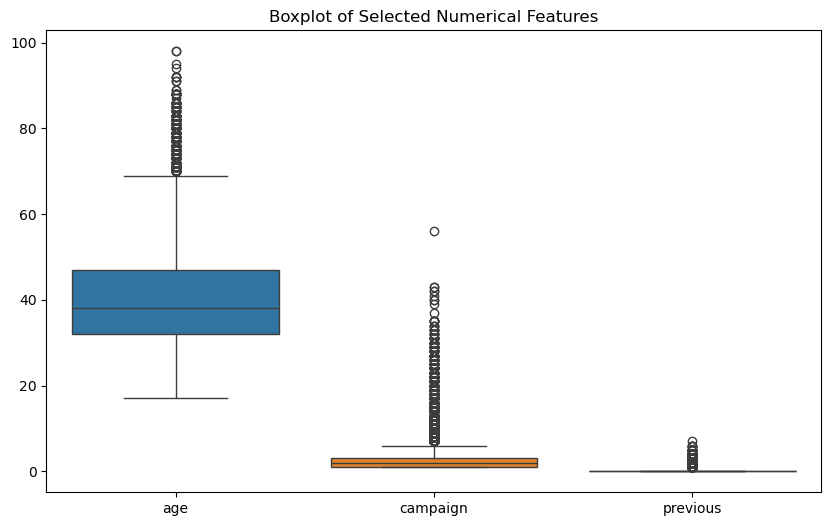

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['age','campaign','previous']])
plt.title("Boxplot of Selected Numerical Features")
plt.show()

In [25]:
df_model = df.drop(columns=['duration'])

In [26]:
df_model.shape

(41188, 21)

In [27]:
df_model = df_model.drop(columns=['age_group'])
df_model.shape

(41188, 20)

In [28]:
df_model['previously_contacted'] = df_model['pdays'].apply(lambda x: 0 if x == 999 else 1)

In [29]:
df_model['pdays'] = df_model['pdays'].replace(999, 0)

In [30]:
df_model[['pdays','previously_contacted']].head()

,pdays,previously_contacted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [31]:
df_model['previously_contacted'].value_counts()

previously_contacted
0    39673
1     1515
Name: count, dtype: int64

In [32]:
df_model['campaign_log'] = np.log1p(df_model['campaign'])

In [33]:
df_model['campaign_level'] = pd.cut(df_model['campaign'],bins=[0,2,5,100],labels=['low','medium','high'])

In [34]:
df_model['previous_campaign_interaction'] = df_model['previous'] * df_model['campaign']

In [35]:
df_model.shape

(41188, 24)

In [36]:
df_model['y'] = df_model['y'].map({'no': 0, 'yes': 1})

In [37]:
X = df_model.drop(columns=['y'])
y = df_model['y']
X.shape, y.shape

((41188, 23), (41188,))

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y,random_state=42)
X_train.shape, X_test.shape

((32950, 23), (8238, 23))

In [39]:
categorical_cols = X_train.select_dtypes(include=['object','category']).columns
numerical_cols = X_train.select_dtypes(exclude=['object','category']).columns
categorical_cols, numerical_cols

(Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'day_of_week', 'poutcome', 'campaign_level'],
       dtype='object'),
 Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
        'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
        'previously_contacted', 'campaign_log',
        'previous_campaign_interaction'],
       dtype='object'))

In [40]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)])

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)
X_train_encoded.shape, X_test_encoded.shape

((32950, 57), (8238, 57))

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_encoded, y_train)

y_pred_log = log_model.predict(X_test_encoded)
y_prob_log = log_model.predict_proba(X_test_encoded)[:, 1]

print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))

[[7217   93]
 [ 722  206]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.22      0.34       928

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238

ROC-AUC: 0.8010610022878437


In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_encoded, y_train)
y_pred_knn = knn_model.predict(X_test_encoded)
y_prob_knn = knn_model.predict_proba(X_test_encoded)[:, 1]
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_knn))

[[7096  214]
 [ 647  281]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1       0.57      0.30      0.39       928

    accuracy                           0.90      8238
   macro avg       0.74      0.64      0.67      8238
weighted avg       0.88      0.90      0.88      8238

ROC-AUC: 0.7473614616255485


### KNN Model

The KNN model shows moderate performance, with slightly improved recall compared to baseline logistic regression but lower overall discriminative power. The ROC-AUC score is lower than logistic regression, indicating weaker ranking ability.

Since KNN is a distance-based algorithm, its performance may be affected by high dimensionality introduced by one-hot encoding.

In [43]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_encoded, y_train)
y_pred_svm = svm_model.predict(X_test_encoded)
y_prob_svm = svm_model.predict_proba(X_test_encoded)[:, 1]

print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_svm))

[[7208  102]
 [ 741  187]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7310
           1       0.65      0.20      0.31       928

    accuracy                           0.90      8238
   macro avg       0.78      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238

ROC-AUC: 0.6686734191471296


### SVM

The linear SVM model did not outperform logistic regression. Recall for the positive class remains low, and the ROC-AUC score is significantly lower compared to other models. This suggests that SVM does not provide additional predictive power for this dataset.


In [44]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_encoded, y_train)
y_pred_dt = dt_model.predict(X_test_encoded)
y_prob_dt = dt_model.predict_proba(X_test_encoded)[:, 1]
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))

[[6587  723]
 [ 601  327]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7310
           1       0.31      0.35      0.33       928

    accuracy                           0.84      8238
   macro avg       0.61      0.63      0.62      8238
weighted avg       0.85      0.84      0.84      8238

ROC-AUC: 0.6279810515826219


### Decision Tree

The Decision Tree model shows moderate performance but relatively low ROC-AUC compared to other models. While recall for the positive class is slightly higher than logistic regression at the default threshold, overall ranking ability is weaker. This suggests that a single tree may be overfitting and lacks the stability required for reliable marketing predictions

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
rf_model.fit(X_train_encoded, y_train)
y_pred_rf = rf_model.predict(X_test_encoded)
y_prob_rf = rf_model.predict_proba(X_test_encoded)[:, 1]

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

[[7107  203]
 [ 656  272]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1       0.57      0.29      0.39       928

    accuracy                           0.90      8238
   macro avg       0.74      0.63      0.67      8238
weighted avg       0.88      0.90      0.88      8238

ROC-AUC: 0.7795221030473136


### Random Forest

The Random Forest model improves over the single Decision Tree by reducing variance and increasing overall stability. It provides a better balance between precision and recall compared to baseline models. However, its ROC-AUC remains slightly lower than logistic regression and gradient boosting, indicating that while it captures nonlinear patterns, it is not the strongest ranking model in this case


In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train_encoded, y_train)

y_pred_gb = gb_model.predict(X_test_encoded)
y_prob_gb = gb_model.predict_proba(X_test_encoded)[:, 1]

print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_gb))

[[7205  105]
 [ 707  221]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.68      0.24      0.35       928

    accuracy                           0.90      8238
   macro avg       0.79      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238

ROC-AUC: 0.811437670998632


### Gradient Boosting

Gradient Boosting achieved the highest ROC-AUC among all evaluated models. This indicates superior ability to rank potential subscribers above non-subscribers. Although recall at the default threshold remains moderate, the model demonstrates strong probability separation, making it suitable for threshold-based marketing strategies.


In [47]:
y_pred_03 = (y_prob_gb >= 0.3).astype(int)
print(confusion_matrix(y_test, y_pred_03))
print(classification_report(y_test, y_pred_03))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_gb))

[[6876  434]
 [ 443  485]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7310
           1       0.53      0.52      0.53       928

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238

ROC-AUC: 0.811437670998632


### Threshold Tuning=0.3

When the classification threshold was lowered to 0.3, recall increased significantly, allowing the model to identify more actual subscribers. However, this improvement came at the cost of reduced precision, resulting in more false positives. This demonstrates the trade-off between capturing more potential customers and increasing marketing costs.

In [48]:
y_pred_02 = (y_prob_gb >= 0.2).astype(int)

print(confusion_matrix(y_test, y_pred_02))
print(classification_report(y_test, y_pred_02))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_gb))

[[6709  601]
 [ 382  546]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7310
           1       0.48      0.59      0.53       928

    accuracy                           0.88      8238
   macro avg       0.71      0.75      0.73      8238
weighted avg       0.89      0.88      0.89      8238

ROC-AUC: 0.811437670998632


### Threshold Tuning= 0.2

Further lowering the threshold to 0.2 increased recall even more, enabling the model to capture a larger proportion of subscribers. However, precision decreased further, leading to more unnecessary calls. This confirms that threshold selection should be guided by business objectives rather than purely statistical performance.


In [49]:
gb_model = GradientBoostingClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train_encoded, y_train)

y_prob_gb = gb_model.predict_proba(X_test_encoded)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_prob_gb))

ROC-AUC: 0.8120816430020285


### Tuned Gradient Boosting Model

After tuning the Gradient Boosting model by increasing the number of estimators and adjusting the learning rate, the ROC-AUC score improved slightly. However, the improvement was marginal compared to the earlier configuration.



In [50]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train_encoded, y_train)

y_prob_xgb = xgb_model.predict_proba(X_test_encoded)[:,1]
y_pred_xgb = (y_prob_xgb >= 0.5).astype(int)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

[[7192  118]
 [ 680  248]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7310
           1       0.68      0.27      0.38       928

    accuracy                           0.90      8238
   macro avg       0.80      0.63      0.67      8238
weighted avg       0.89      0.90      0.88      8238

ROC-AUC: 0.813085301783103


### XGBoost Model

XGBoost achieved the highest ROC-AUC among all evaluated models. However, the improvement over the tuned Gradient Boosting model was minimal. This indicates that boosting-based approaches are well-suited for this dataset, while additional algorithmic complexity provides only limited incremental benefit

### Final Model Selection

Given the negligible performance difference between XGBoost and Gradient Boosting, the tuned Gradient Boosting model was selected as the final model. The decision was based on its strong predictive performance, simpler implementation within the sklearn framework, and easier interpretability. This ensures a balance between accuracy, model stability, and practical deployment considerations.

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": y_prob_log,
    "KNN": y_prob_knn,
    "SVM": y_prob_svm,
    "Decision Tree": y_prob_dt,
    "Random Forest": y_prob_rf,
    "Gradient Boosting": y_prob_gb,
    "XGBoost": y_prob_xgb
}

comparison = []

for name, probs in models.items():
    preds = (probs >= 0.5).astype(int)
    
    comparison.append({
        "Model": name,
        "Precision (Yes)": precision_score(y_test, preds),
        "Recall (Yes)": recall_score(y_test, preds),
        "F1 Score (Yes)": f1_score(y_test, preds),
        "ROC-AUC": roc_auc_score(y_test, probs)
    })

In [60]:
comparison_df = pd.DataFrame(comparison).sort_values(by="ROC-AUC", ascending=False)
comparison_df

,Model,Precision (Yes),Recall (Yes),F1 Score (Yes),ROC-AUC
6,XGBoost,0.677596,0.267241,0.383308,0.813085
5,Gradient Boosting,0.679758,0.242457,0.357427,0.812082
0,Logistic Regression,0.688963,0.221983,0.335778,0.801061
4,Random Forest,0.567404,0.303879,0.395789,0.779522
1,KNN,0.567677,0.302802,0.394940,0.747361
2,SVM,0.647059,0.201509,0.307313,0.668673
3,Decision Tree,0.306348,0.358836,0.330521,0.627981


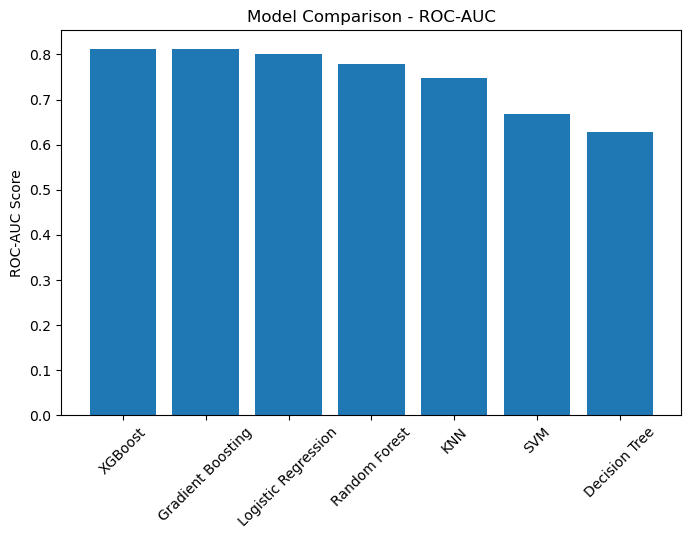

In [61]:
plt.figure(figsize=(8,5))
plt.bar(comparison_df["Model"], comparison_df["ROC-AUC"])
plt.xticks(rotation=45)
plt.ylabel("ROC-AUC Score")
plt.title("Model Comparison - ROC-AUC")
plt.show()

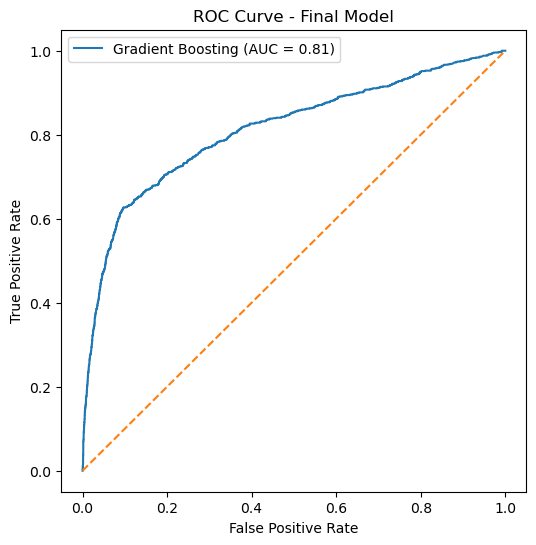

In [62]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_prob_gb)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label="Gradient Boosting (AUC = 0.81)")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Final Model")
plt.legend()
plt.show()

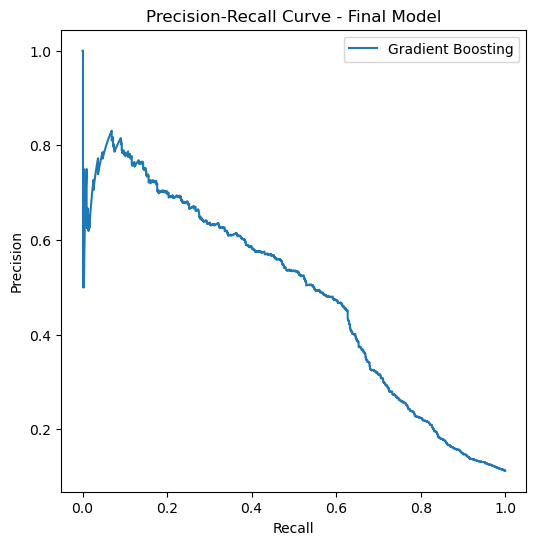

Average Precision Score: 0.4823689775292598


In [63]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob_gb)

plt.figure(figsize=(6,6))
plt.plot(recall, precision, label="Gradient Boosting")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Final Model")
plt.legend()
plt.show()

print("Average Precision Score:", average_precision_score(y_test, y_prob_gb))

In [64]:
feature_names = preprocessor.get_feature_names_out()

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": gb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df.head(10)

,Feature,Importance
53,num__nr.employed,0.562459
52,num__euribor3m,0.086054
51,num__cons.conf.idx,0.059116
42,cat__poutcome_success,0.050533
54,num__previously_contacted,0.041876
47,num__pdays,0.039978
45,num__age,0.026577
35,cat__month_oct,0.022127
27,cat__contact_telephone,0.019166
50,num__cons.price.idx,0.012005
